# Декомпозиция проекта: мобильное приложение сервиса "Ненужные вещи"

**Цель исследования:** выделить наиболее перспективный сегмент пользователей, который станет целевой аудиторией для развития приложения.

**Основные задачи:**
1. Выбрать методику сегментации.
2. Определить какая группа пользователей чаще возвращается в мобильное приложение.
3. Определеить пользователи какой группы чаще совершают целевое событие (открывают контакты).
4. Сформировать рекомендации по развитию приложения на основе анализа выдвинутых гипотез.

**Описание данных:**

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

**Структура исследования:**
1. Предобработка данных

        1.1. Общая информация о данных в датасетах 
        1.2. Обработка пропусков
        1.3. Приведение данных к необходимым типам
        1.4. Приведение наименований стобцов и данных к единому виду
        1.5. Обработка дубликаов
        1.6. Объединение датасетов
        1.7. ВЫВОД (промежуточный)
    
2. Определение поведения пльзователей (исследовательский анализ)

        2.1. Профили пользователей
        2.2. Удержание пользователей (retention rate)
        2.3. Время, проведенное пользователями в приложении
            2.3.1. Выделение сессий
            2.3.2. Определение времени сессий
        2.4. Частота совершения событий пользователями
        2.5. Конверсия пользователей в целевое событие (открытие контактов - contacts_show)
        2.6. ВЫВОД (промежуточный)
        
3. Сегментация

        3.1. Выбор признака сегментации и разделение на группы
        3.2. Удержание пользовтелей по сегментам
        3.3. Конверсия пользователей в целевое событие по сегментам
        3.4. ВЫВОД (промежуточный)
        
4. Проверка статсистических гипотез

        4.1. Гипотеза 1 - группа пользователей, установивших приложение по ссылке yandex и по ссылке из google демонстрируют разную конверсию в просмотры контактов
        4.2. Гипотеза 2 - пользователи, переходящие в рекомендованные объявления, и пользователи, игнорирующие рекомендации демонстрируют разную конверсию в просмотры контактов
        4.3. ВЫВОД по статистическим гипотезам
5. Общий вывод и рекомендации

Также необходимо сформировать:
- презентацию;
- дашборд.

## Загрузка данных 

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import scipy.stats as stats
from scipy import stats as st
import math as mth
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузка данных 
try:
    mobile_sourсes, mobile_dataset = (
     pd.read_csv('mobile_sourсes.csv'),
     pd.read_csv('mobile_dataset.csv')
    )
except FileNotFoundError:
    print('Укажи верный путь к файлу')

## Предобработка данных

### Общая информация о данных в датасетах 

In [3]:
# вывод таблиц на экран
display (mobile_dataset.head())
mobile_sourсes.head()

event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

In [4]:
# общая информация
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [6]:
mobile_sourсes['source'].nunique()

3

In [7]:
mobile_sourсes['userId'].nunique()

4293

**Вывод:**
- датасеты содержат информацию о 74 197 событиях в приложении и 4 293 установках из 3х типов источников (google, Yandex, other);
- по общей информации видно, что все данные типа object. Для удобства анализа необходимо будет привести дату и время к типу datetime;
- также отметим, что для удобства работы стоит привести наименование столбцов к единому виду.

### Обработка пропусков

По общей информации было видно, что пропуски отсутсвуют, но убедимся в этом следующим способом:

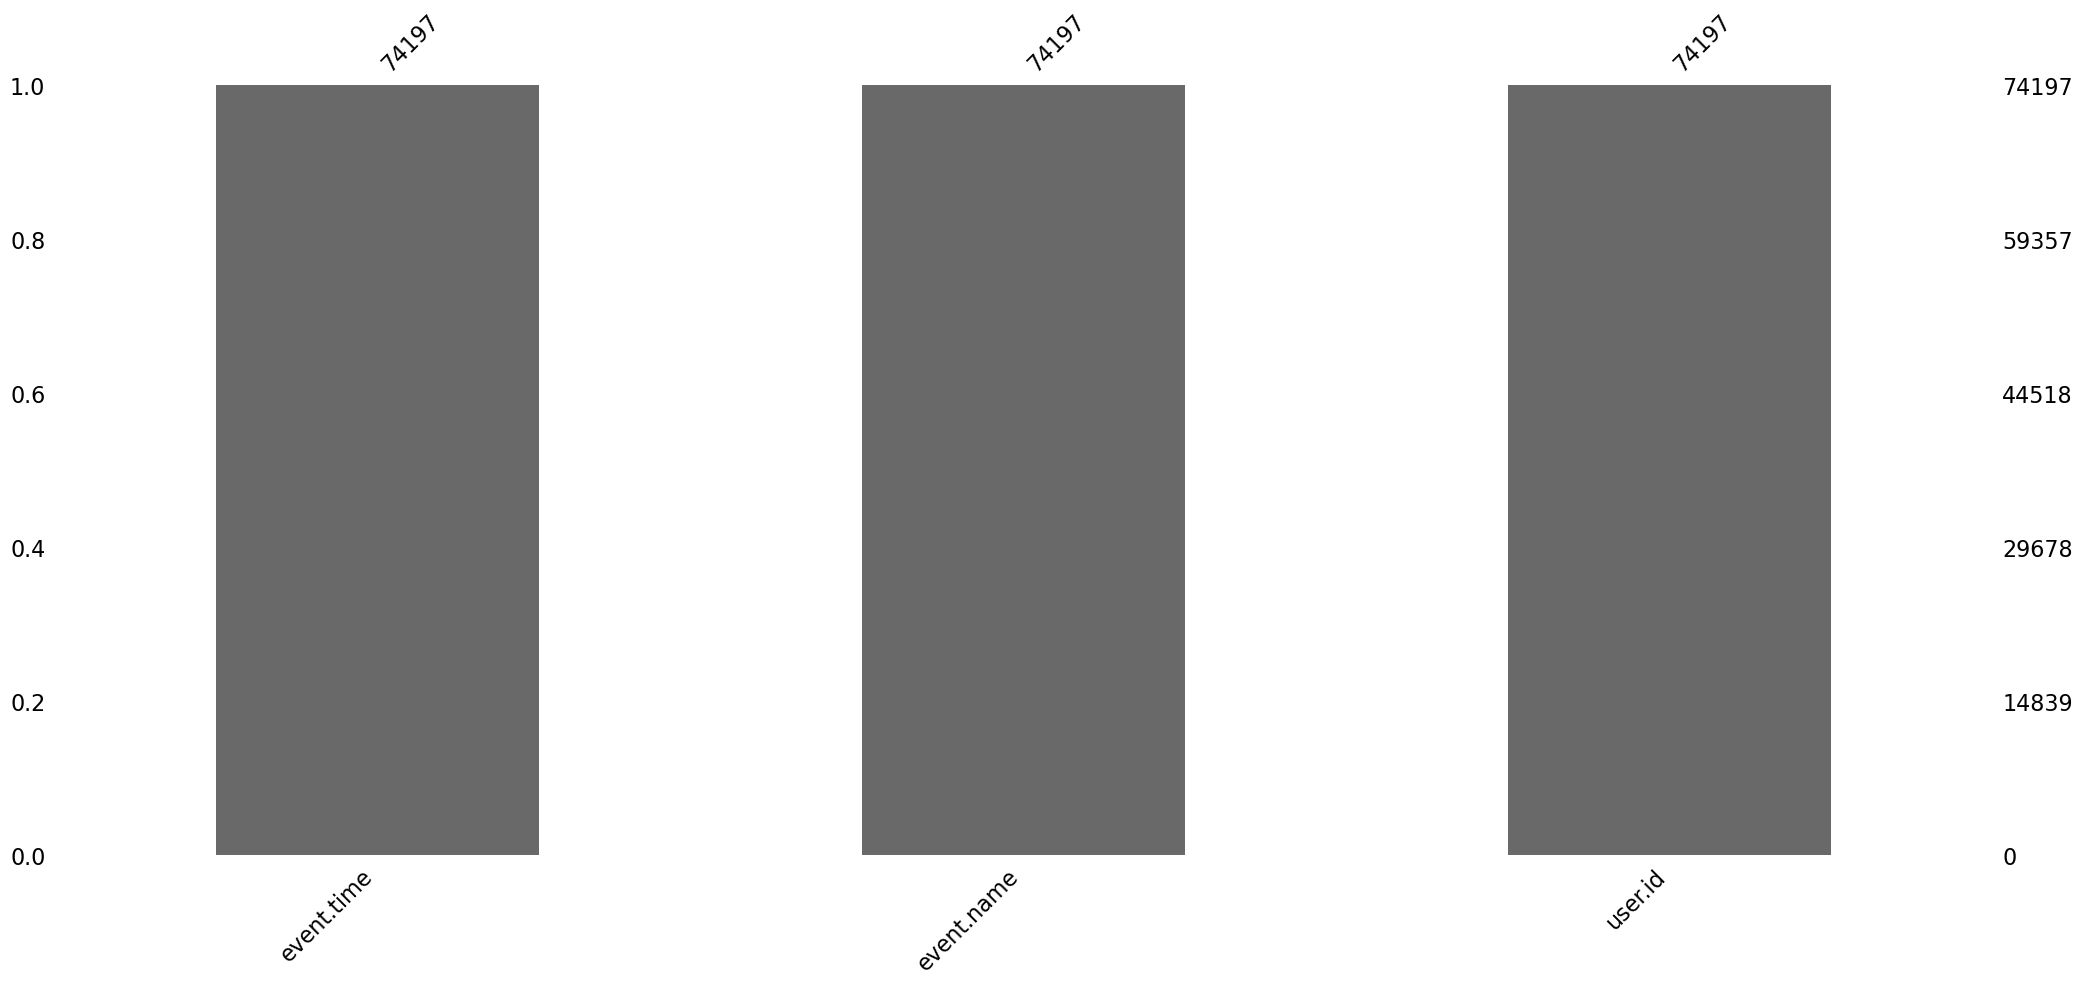

In [8]:
!pip install missingno
 
import missingno as msno
msno.bar(mobile_dataset);

**Вывод:** в датасетах нет пропусков

### Приведение данных к необходимым типам

In [9]:
# приведение дат к типо datetime
mobile_dataset['event.time'] = pd.to_datetime(mobile_dataset['event.time']).round('S')
mobile_dataset.head(2)

event.time   event.name                               user.id
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894

In [10]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event.time  74197 non-null  datetime64[ns]
 1   event.name  74197 non-null  object        
 2   user.id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


###  Приведение наименований стобцов и данных к единому виду

In [11]:
mobile_dataset.columns = mobile_dataset.columns.str.replace('.', '_')

In [12]:
mobile_dataset.head(2)

event_time   event_name                               user_id
0 2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894
1 2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894

In [13]:
mobile_sourсes = mobile_sourсes.rename(columns = {'userId':'user_id'})

In [14]:
mobile_sourсes.head(2)

user_id  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex

### Обработка дубликаов

In [15]:
# проверка на явные дубликаты
display(mobile_dataset.duplicated().sum())
mobile_sourсes.duplicated().sum()

1118

0

In [16]:
# процент дубликатов
x = mobile_dataset.duplicated().sum()/mobile_dataset['event_time'].count()
f'Процент дубликатов в датасете mobile_dataset: {x:.2%}'

'Процент дубликатов в датасете mobile_dataset: 1.51%'

Процент дубликатов мал, знаит можно удалить явные дубликаты из датасета

In [17]:
mobile_dataset = mobile_dataset.drop_duplicates()

In [18]:
mobile_dataset.duplicated().sum()

0

In [19]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73079 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73079 non-null  datetime64[ns]
 1   event_name  73079 non-null  object        
 2   user_id     73079 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.2+ MB


**Вывод:** после удаления явных дубликатов в датасете осталось 73 079 событий

### Объединение событий в датасете

In [20]:
#просмотр уникальных значений событий
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

Так как `contacts_show` и `show_contacts` являются одним событием, то необходимо привети их к одному наименованию. 
Также можно все события связанные с поиском назвать одинаково.

In [21]:
# объединение contacts_show и show_contacts
mobile_dataset_clean = mobile_dataset
mobile_dataset_clean['event_name'] = mobile_dataset_clean['event_name'].replace('contacts_show', 'show_contacts')    
for s in ['search_1','search_2', 'search_3', 'search_4','search_5', 'search_6', 'search_7']:
    mobile_dataset_clean['event_name'] = mobile_dataset_clean['event_name'].replace(s, 'search') 
mobile_dataset_clean['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'show_contacts', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

In [22]:
mobile_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73079 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73079 non-null  datetime64[ns]
 1   event_name  73079 non-null  object        
 2   user_id     73079 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.2+ MB


### Объединение датасетов

In [23]:
data = mobile_dataset_clean.merge(mobile_sourсes, how='outer')

In [24]:
# добавление столбца с неделями
data['event_week'] = data['event_time'].astype('datetime64[W]')

In [25]:
data

event_time   event_name                               user_id  \
0     2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1     2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
2     2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
3     2019-10-07 00:01:28  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
4     2019-10-07 00:01:35    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
...                   ...          ...                                   ...   
73074 2019-11-03 23:46:47          map  d157bffc-264d-4464-8220-1cc0c42f43a9   
73075 2019-11-03 23:46:59  advert_open  d157bffc-264d-4464-8220-1cc0c42f43a9   
73076 2019-11-03 23:47:01    tips_show  d157bffc-264d-4464-8220-1cc0c42f43a9   
73077 2019-11-03 23:47:47  advert_open  d157bffc-264d-4464-8220-1cc0c42f43a9   
73078 2019-11-03 23:47:50    tips_show  d157bffc-264d-4464-8220-1cc0c42f43a9   

       source          event_week  
0       other 2019-10-07 00:00:00  
1       other 2019-10-07 00:00:01  
2       other 2019-10-07 00:00:07  
3       other 2019-10-07 00:01:28  
4       other 2019-10-07 00:01:35  
...       ...                 ...  
73074  google 2019-11-03 23:46:47  
73075  google 2019-11-03 23:46:59  
73076  google 2019-11-03 23:47:01  
73077  google 2019-11-03 23:47:47  
73078  google 2019-11-03 23:47:50  

[73079 rows x 5 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73079 entries, 0 to 73078
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73079 non-null  datetime64[ns]
 1   event_name  73079 non-null  object        
 2   user_id     73079 non-null  object        
 3   source      73079 non-null  object        
 4   event_week  73079 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.3+ MB


**Вывод:** в объединенном датасете сохраниось 73 079 событий, это значит, что в датасете с источниками установок не было "лишних" пользователей, не совершивших никаких событий.

### ВЫВОД по разделу 2

По резульатам предобработки данных:
1. Данные приведены в формат, удобный для дальнейшего анализа (изменены наименования столбцов, объединены события search, объединены два вида наименования целевого событи).
2. Удалены явные дубликаты из датасета с событиями.
3. Пропуски в датасетах отсутсвуют.
4. Все данные объединены в общий датасет, содержащий 73 079 записей (событий) для 4 293 уникальных пользователей, установивших приложение.

## Определение поведения пльзователей (исследовательский анализ)

### Профили пользователей

In [27]:
def get_profiles(events):

    """
    Эта функция определяет профили пользователей.

    На вход функция принимает общий датасет с событиями.
    На выходе функция возвращает перофили пользователей, включающие их первое событие, 
    наименование этого события, источник установки и дату события
    """
    profiles = (
        events.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'event_name':'first','source': 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['week'] = profiles['first_ts'].astype('datetime64[W]')

    return profiles

In [28]:
profiles = get_profiles(data)
profiles.head()

user_id            first_ts     event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46      tips_show   
1  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:34         search   
2  00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35    photos_show   
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:06         search   
4  00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41  show_contacts   

   source          dt                week  
0   other  2019-10-07 2019-10-07 13:39:46  
1  yandex  2019-10-19 2019-10-19 21:34:34  
2  yandex  2019-11-01 2019-11-01 13:54:35  
3  google  2019-10-18 2019-10-18 22:14:06  
4  yandex  2019-10-25 2019-10-25 16:44:41

In [29]:
# определение минимальной даты первого события
first_ts_min = profiles['first_ts'].min()
first_ts_min

Timestamp('2019-10-07 00:00:00')

In [30]:
# определение максимальной даты первого события
first_ts_max = profiles['first_ts'].max()
first_ts_max

Timestamp('2019-11-03 23:46:47')

**Вывод:** 
- с помощью функции получены профили пользоватлей, включающие дату и время первого события, совершенного пользоватлем, наименование этого события, источник установки для этого пользоватлея и отдельно дату этого события;
- проверка самого ранненго первого события и самого позднего первого события показывает, что мы обладаем данным для пользоватлей, пришедших с 7 октября 2019 года по 3 ноября 2019.

### Удержание пользователей (retention rate)

In [31]:
# функция для расчёта удержания
def get_retention(
    profiles, sessions
):
    '''
    Данная функция определяет удержание пользователей по неделям
    
    Функция принимает на вход общий датасет с событиями
    и датасет профилей пользоватлей.
    На выходе функция возвращает таблицу с данными из профилей, с неделей, 
    когда было соврешено событие и лайфтайм в днях (количество дней кратно 7-ми)
    '''    
    # сбор сырых данных
    result_raw = profiles.merge(
        sessions[['user_id', 'event_week']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_week'] - result_raw['week']
    ).dt.days

    # рассчитет удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # восстанавление столбеца с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [32]:
# получаем сырые данные и готовую таблицу
retention_raw, retention_rate = get_retention(profiles, data)

In [33]:
# функция построения хитмэпа удержания 

def heatmap(retention):
    #plt.figure(figsize=(15, 15)) 
    sns.heatmap(
        retention.drop(columns=['cohort_size', 0]),  
        annot=True, 
        fmt='.2%', 
    )
    plt.title('Тепловая карта удержания')
    plt.xlabel('Лайфтайм')
    plt.ylabel('Дата первого действия пользователей')
    plt.show()

In [34]:
# переименование столбцов недель для удобства
retention_rate = retention_rate.rename(columns={7: '1st week', 14: '2nd week', 21: '3d week', 28: '4th week'})

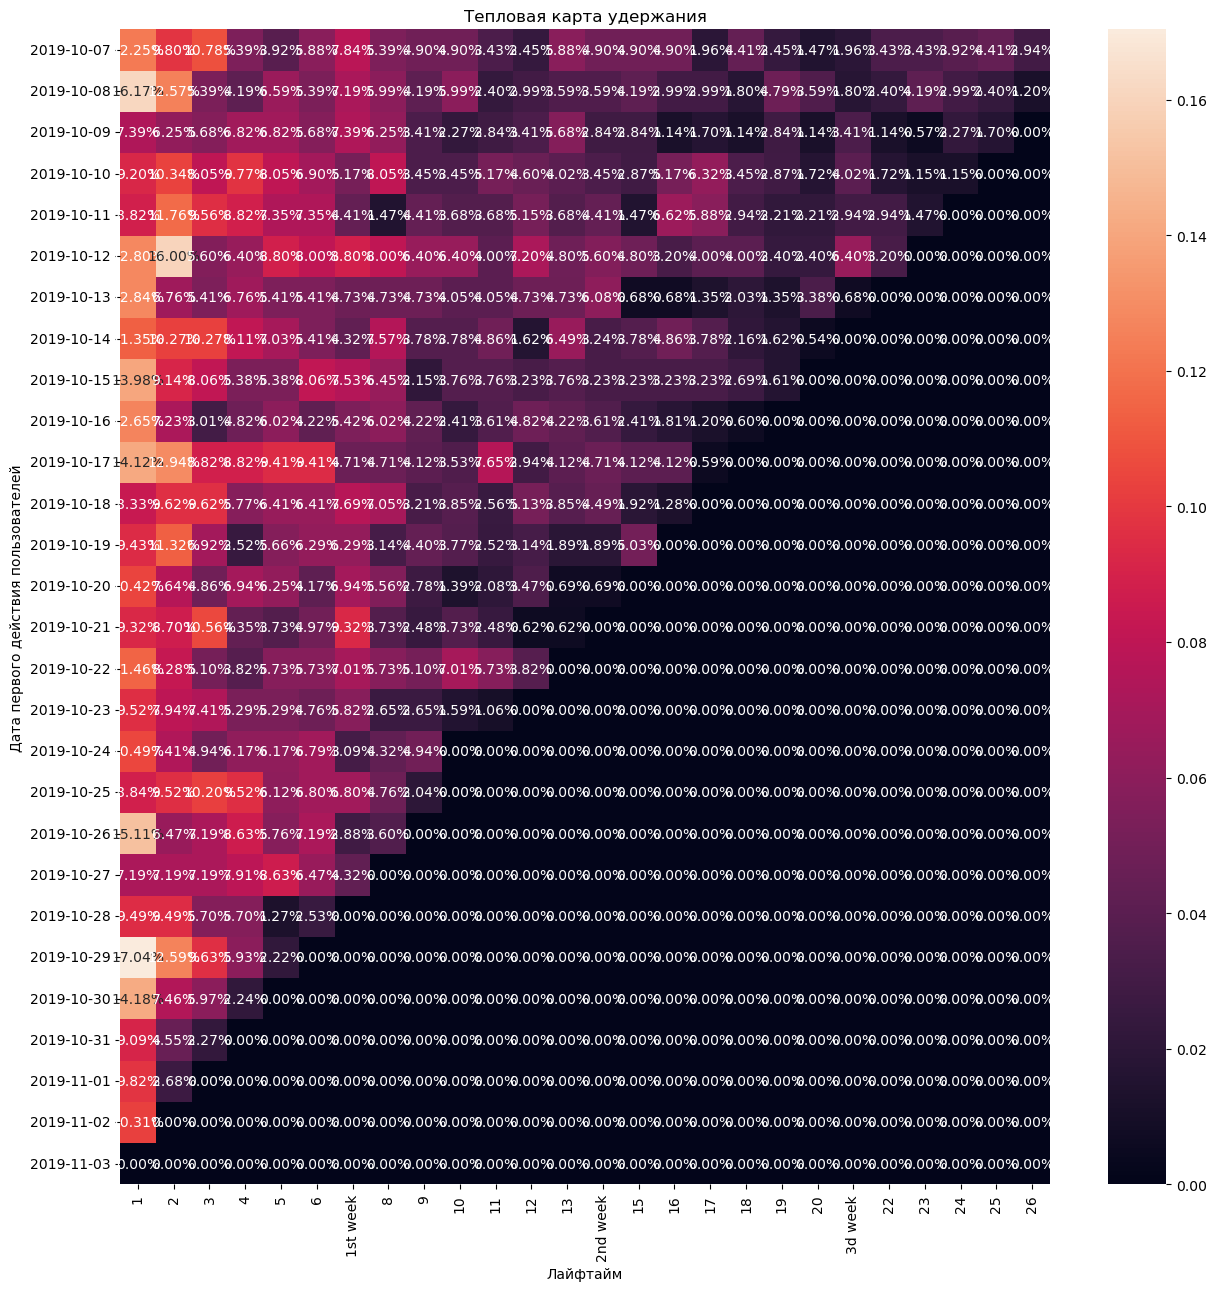

In [35]:
# построение 
plt.figure(figsize=(15, 15)) 
heatmap(retention_rate)

**Вывод:** 
- 4ую неделю можно оценить пока только для пользователей, пришедших в первые три дня исследуемого периода
- среди них можно увидеть интересный факт, что чем больше было удержание на первой неделе, тем хуже удржание к 4ой
- пользователи, пришедшие с 21.10.2019 еще не прожили одну неделю, поэтом для них не рассчитывается удеражание
- для тех пользователей, которые "прожили" три недели, зависимость прямая, чем выше удержание в первую неделю, тем выше и во второрую, и в третью, за исключением 15 и 16 октября
- для пользователей "проживших" две недели удержание 1ой недели растет от 1ого дня к последнем, при этом удеражание 2ой недели не зависит от удержания первой
- удержание 1ой недели варьируется от 9.24% 24.10.2019 до 35.39% 23.10.2019
- удержание 2ой недели варьируется от 5.56% 20.10.2019 до 19.28% 16.10.2019
- удержание 3ей недели варьируется от 4.73% 13.10.2019 до 13.24% 07.10.2019
- удержание 4ой недели варьируется от 5.68% 09.10.2019 до 8.38% 08.10.2019
- ни одни из дат с крайними значениями удержаний не совпадают

### Время, проведенное пользователями в приложении

#### Выделение сессий

In [36]:
#подготовка датасета к формированию сессий - сортировка 
data_sorted = data.sort_values(['user_id', 'event_time']) 

In [37]:
# определение медианной разницы между временем соседних событий
delta = data_sorted.groupby('user_id')['event_time'].diff()
delta.median()

Timedelta('0 days 00:01:12')

Выше была рассчитана разница между временем соседних событий. Рассчитав медианное значение для распределения полученной дельты можно предположить, что большинство новых действий начинается примерно через 1 час 12 минут после начала предыдущих. Округлим это значение до 1 часа. То есть для разделения на сессии за дельту можно принять дельту 60 минут

In [38]:
# определение разницы больше 60 минут для  каждой группы с кумулятивной суммой
g = (delta > pd.Timedelta('60Min')).cumsum()
# создание счетчика для групп 
data_sorted['session_id'] = data_sorted.groupby(['user_id', g], sort=False).ngroup() + 1
data_sorted['time_delta'] = delta

In [39]:
data_sorted = data_sorted.reset_index(drop=True)
data_sorted

event_time     event_name  \
0     2019-10-07 13:39:46      tips_show   
1     2019-10-07 13:40:31      tips_show   
2     2019-10-07 13:41:06      tips_show   
3     2019-10-07 13:43:21      tips_show   
4     2019-10-07 13:45:31      tips_show   
...                   ...            ...   
73074 2019-11-03 15:51:24      tips_show   
73075 2019-11-03 15:51:58  show_contacts   
73076 2019-11-03 16:07:41      tips_show   
73077 2019-11-03 16:08:18      tips_show   
73078 2019-11-03 16:08:25      tips_show   

                                    user_id  source          event_week  \
0      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:39:46   
1      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:40:31   
2      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:41:06   
3      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:43:21   
4      0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other 2019-10-07 13:45:31   
...                                     ...     ...                 ...   
73074  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:24   
73075  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 15:51:58   
73076  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:07:41   
73077  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:18   
73078  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google 2019-11-03 16:08:25   

       session_id      time_delta  
0               1             NaT  
1               1 0 days 00:00:45  
2               1 0 days 00:00:35  
3               1 0 days 00:02:15  
4               1 0 days 00:02:10  
...           ...             ...  
73074        9573 0 days 00:00:28  
73075        9573 0 days 00:00:34  
73076        9573 0 days 00:15:43  
73077        9573 0 days 00:00:37  
73078        9573 0 days 00:00:07  

[73079 rows x 7 columns]

**Вывод:**
- за одну сессию приняли время 1 час, т.к. медианная разница между двумя событиями 1 час 12 минут 
- получено 9 573 сессии 

#### Определение времени сессий

In [40]:
#Определение времени каждой сессии
sessions_time = data_sorted.groupby(['session_id']).agg({'event_time':['min','max']}).rename(columns = {'min':'start_time', 'max':'finish_time'}).reset_index()
sessions_time['time'] = sessions_time['event_time', 'finish_time']-sessions_time['event_time', 'start_time']
sessions_time['minutes'] = round(sessions_time['time'].dt.seconds/60,2)
sessions_time

session_id          event_time                                time  \
                         start_time         finish_time                   
0             1 2019-10-07 13:39:46 2019-10-07 13:49:42 0 days 00:09:56   
1             2 2019-10-09 18:33:56 2019-10-09 18:42:23 0 days 00:08:27   
2             3 2019-10-21 19:52:31 2019-10-21 20:07:30 0 days 00:14:59   
3             4 2019-10-22 11:18:15 2019-10-22 11:30:53 0 days 00:12:38   
4             5 2019-10-19 21:34:34 2019-10-19 21:59:55 0 days 00:25:21   
...         ...                 ...                 ...             ...   
9568       9569 2019-11-01 00:24:31 2019-11-01 00:24:53 0 days 00:00:22   
9569       9570 2019-11-02 01:16:49 2019-11-02 01:16:49 0 days 00:00:00   
9570       9571 2019-11-02 18:01:27 2019-11-02 18:17:41 0 days 00:16:14   
9571       9572 2019-11-02 19:25:54 2019-11-02 19:30:50 0 days 00:04:56   
9572       9573 2019-11-03 14:32:56 2019-11-03 16:08:25 0 days 01:35:29   

     minutes  
              
0       9.93  
1       8.45  
2      14.98  
3      12.63  
4      25.35  
...      ...  
9568    0.37  
9569    0.00  
9570   16.23  
9571    4.93  
9572   95.48  

[9573 rows x 5 columns]

In [41]:
#построение боксплота распределения времени сессии
df = px.data.tips()
fig = px.box(sessions_time, y="minutes", points="all")
fig.update_layout(title='Распределение сессий по времени',
                   yaxis_title='Время сессии, минуты'
                  )
fig.show()

In [42]:
#характеристики распределения времени сессий 
sessions_time['time'].describe()

count                         9573
mean     0 days 00:17:30.913715658
std      0 days 00:28:32.457677489
min                0 days 00:00:00
25%                0 days 00:00:44
50%                0 days 00:06:49
75%                0 days 00:21:45
max                0 days 07:14:59
Name: time, dtype: object

 На графике распределения времени сессий видно, что длинные сессии это явные аномалии (пользователь не вышел из приложения и оно автоматически не закрылось, программынй сбой в сборе данных, приложение зависло, а запись сессии продолжалась и т.п.). Но значений близких к 0 много. В связи с этим посмотрим на количество нулевых сессиий и попробуем предположить их происхождение.

In [43]:
#расчет количества нулевых сессий
sessions_0 = sessions_time[sessions_time['time'] == '0 days 00:00:00']
sessions_0['session_id'].count()

1780

In [44]:
#выборка нулевых сессий
sessions_0_id = sessions_0['session_id'].unique()

In [45]:
# просмотр событий в нулевых сессиях
data_sorted.query('session_id in @sessions_0_id').groupby('event_name').agg({'event_name':'count'})

event_name
event_name               
advert_open            40
favorites_add          21
map                    82
photos_show           467
search                340
show_contacts         107
tips_click              7
tips_show             716

**Вывод:**
- в среднем пользователи проводят в приложении 17.5 минут за один раз (одну сессию)
- однако есть значительные выбросы: максимальная сессия была 7 часов 15 минут, тогда как 75% всех сессий укладываются в 22 минуты
- таким образом лучше смотреть на медианное знадение длины сессий, которое составляет 6 минут 49 секунд

### Частота совершения событий пользователями

In [46]:
# вывод общего распределения событий 
# группировка по событиям
data_events = data.groupby('event_name').agg({'event_name':'count'}).rename(columns = {'event_name':'amount_of_events'}).sort_values(by='amount_of_events').reset_index()

In [47]:
# столбчатая диаграмма по событиям 
fig = px.bar(data_events, x='event_name', y='amount_of_events', title='Общее количество событий по типам', text='amount_of_events')
fig.update_xaxes(title_text='Название события') 
fig.update_yaxes(title_text='Количество событий')
fig.update_layout(width=600, height=600)
fig.update_traces(hoverinfo="all", hovertemplate="Название события: %{x}<br>Количество совершенных событий: %{y}")
fig.show()

In [48]:
# количество совершенных событий по типам от общего числа событий
fig = go.Figure(data=[go.Pie(labels=data_events['event_name'], values=data_events['amount_of_events'])])
fig.update_layout(title='Распределение количетсва событий',
                  width=600, 
                  height=400,
                  annotations=[dict(x=1.33, 
                                    y=1.10,
                                    text='Событие',
                                    showarrow=False)])
fig.show()

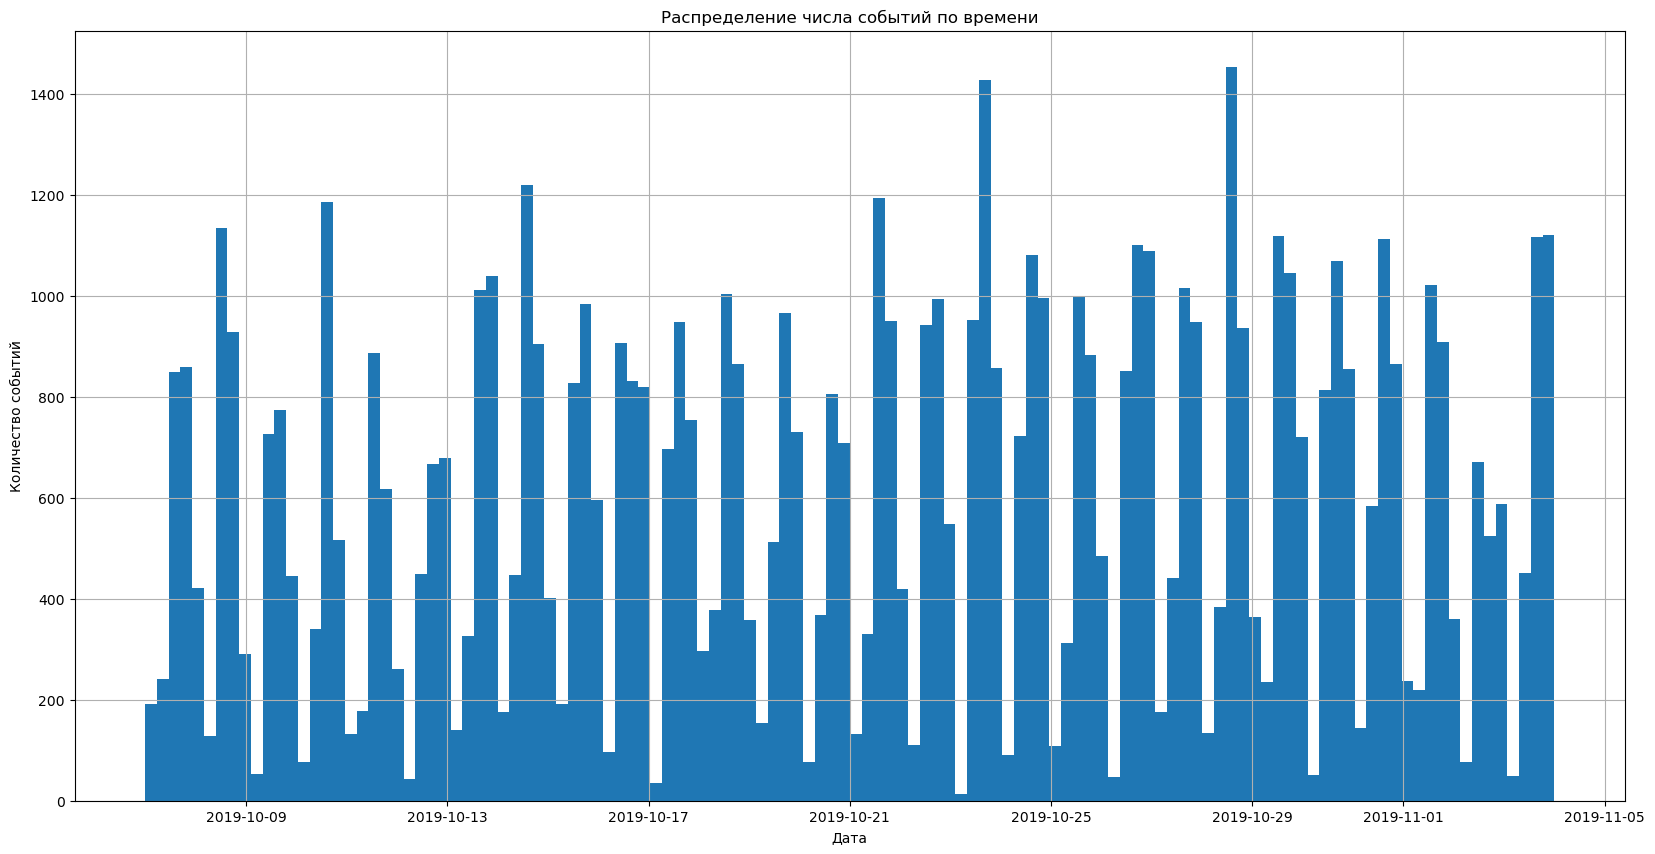

In [49]:
# построекние гистограмы числа событий по дате и времени
data['event_time'].hist(bins=120, figsize = (20,10))
plt.title('Распределение числа событий по времени')
plt.xlabel('Дата')
plt.ylabel('Количество событий');

In [50]:
#распределение событий по дням и по названиям
data['dt'] = data['event_time'].dt.date
fig = px.histogram(data,
             x='dt', 
             color='event_name'
            )
fig.update_layout(title='Распределение событий по времени',
                   width=1000, 
                   height=1000,
                   xaxis_title='Дата',
                   yaxis_title='Количество событий',
                   bargap=0.2
                  )
fig.show() 

In [51]:
# просмотр распределения количества событий в течение дня для самого "активного" дня - 23 октября
data_23oct = data[data['dt'] == pd.to_datetime('2019-10-23')]
fig = px.histogram(data_23oct,
             x='event_time', 
             #color='event_name'
            )
fig.update_layout(title='Распределение событий по времени 23 октября 2019 года',
                   width=800, 
                   height=600,
                   xaxis_title='Время',
                   yaxis_title='Количество событий',
                   bargap=0.2
                  )
fig.show() 

In [52]:
#добавление к датасету дня недели совершения события 
data['weekday'] = data['event_time'].dt.day_name ()
data_events_weekday = data.groupby(['weekday','event_name']).agg({'event_name':'count'}).rename(columns = {'event_name':'amount'}).sort_values(by='amount', ascending = False).reset_index()

In [53]:
#распределение событий по дням недели и по названиям
fig = px.bar(data_events_weekday.sort_values(by = 'amount', ascending = False),
             x='weekday', 
             y='amount',
             color='event_name',
             text = 'amount'
            )
fig.update_layout(title='Распределение событий по дням недели',
                   width=800, 
                   height=600,
                   xaxis_title='День недели',
                   yaxis_title='Количество событий'
                  )
fig.show() 

#общее распределение по дням недели 
data_events_weekday_short = data.groupby(['weekday']).agg({'event_name':'count'}).rename(columns = {'event_name':'amount'}).sort_values(by='amount', ascending = False).reset_index()
fig = px.bar(data_events_weekday_short.sort_values(by = 'amount', ascending = False),
             x='weekday', 
             y='amount',
             text = 'amount'
            )
fig.update_layout(title='Распределение событий по дням недели',
                   width=800, 
                   height=300,
                   xaxis_title='День недели',
                   yaxis_title='Количество событий'
                  )
fig.show() 

**Выводы:**
- чаще всего пользователи видели рекомендованные объявления 39 892 раза, что составляет 52% всех событий 
- меньше всего пользователи звонили по телефону - всего 532 раза раз все время
- целевое событие "просмотр контактов" за весь период составляет 5.99% от всех совершенных событий за рассматриваемый период
- на общей гистограмме распределения событий по времени видны резкие взлеты и падения по периодам, с учетом того, что на гистограмме распределения по дням таких колебаний нет, данная картина связана с автоматическим объединением и колебаниями использования в течение суток 
- при просмотре распределения числа событий по дням, можно заметить некоторый волнообразный рост и падение количества событий 
- распределение событий за день в целом соответсвует общему распределению событий по категориям
- для подтверждения неравномерности использования приложения в течение суток, был рассмотрен день, в который произошло наибольшее количество событий - 23 октября 2019; в этот день видно почти полное отсутсвие событий с часа ночи до 8:30 утра, практически равномерный рост до 13 часов (можно предположить обеденный перерыв у части пользователей), затем небольшой провал по активности и пиковые значения активности пользователей с 14:30 до 14 (также может быть какой-то перерыв в работе, вероятно, у большинства пользователей) и с 16 до 17 (выдалась свободная минутка в конце рабочего дня), следующая "волна" активности с 19:30 до 22 (вечером поискать нужные вещи для себя и интерьера)
- при анализе активности пользоватей по дням ндели видно, что самая высокая активность в понедельник, далее она равномерно снижаетмя субботы, а в воскресенье вновь возрастает почти до уровня четверга 

### Конверсия пользователей в целевое событие (открытие контактов - show_contacts)

In [54]:
# расчет конверсии относительно общего числа пришедших пользователей
convertion = (data[data['event_name'] == 'show_contacts']['user_id'].nunique())/(data['user_id'].nunique())
f'Конверсия пользователей в целевое событие "просмотр контактов": {convertion:.2%}'

'Конверсия пользователей в целевое событие "просмотр контактов": 22.85%'

**Вывод:** 22,85% процентов пользователей доходят до целевого события просмостра контактов

### ВЫВОД по разделу 3

По результатам рассмотрения общего повдения пользоватлей приложения:
1. С помощью тепловой карты отражено удержание пользователей по неделям (максимальный срок, который успели "прожить" пользователи - 4 недели). Отсутсвует прямая зависимость между удержанием 1ой и последующих недель. Вариативность значений удержания очень велика, так удержание 1ой недели варьируется от 9.24% 24.10.2019 до 35.39% 23.10.2019. Часто после прихода пользоватей с высокой степерью удержания на следующий день приходят пользователи, которые не остаются в приложении. 
2. 75% процентов пользователей проводят в приложении не более 22 минут, а медианное время сессии составляет чуть больше 6 минут.
3. Самое часто своершаемое событие - это просмотр рекомендаций. Целевое событие составляе почти 6% от всех совершенных за рассматриваемый период событий. 
4. Самая высокая активность пользователей наблюдается с 14:30 до 14:00  и с 16:00 до 17:00.
5. По дням недели самая высокая активность в понедельник, а самая низкая в субботу.
6. Конверсия пользователей в целевое событие открытие контактов составляет около 23%.

## Сегментация

### Выбор признака сегментации и разделение на группы

На основе авктивности по дням недели предлагается сегментация по признаку: в какой день недели пользователь совершил первое действие (т.е. пришел в приложение).

Понимание, в какой день недели приходят наиболее преспективные пользователи позволит повысить эффективность рекламных кампаний (можно будет запускать рекламу  и акции в определенный день недели), усилить активность генерации рекомендаций в определенные дни, давать рекомендации продавцам на основе внутренней аналитики.

На первый взгляд можно предположить, что наиболее привлекательными и перспективными будут пользователи, приходящие в пондельник-вторник и, возможно, в воскресенье, в связи с их высокой активностью.

Для начала посмотрим в приниципе сколько пользователей совершило свое первое действие в каждый день недели.

In [55]:
#добавление в таблицу профилей пользователей столбца с днем недели первого действия
profiles['weekday'] = profiles['first_ts'].dt.day_name ()
profiles['weekday_number'] = profiles['first_ts'].dt.weekday
profiles.head()

user_id            first_ts     event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46      tips_show   
1  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:34         search   
2  00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35    photos_show   
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:06         search   
4  00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41  show_contacts   

   source          dt                week   weekday  weekday_number  
0   other  2019-10-07 2019-10-07 13:39:46    Monday               0  
1  yandex  2019-10-19 2019-10-19 21:34:34  Saturday               5  
2  yandex  2019-11-01 2019-11-01 13:54:35    Friday               4  
3  google  2019-10-18 2019-10-18 22:14:06    Friday               4  
4  yandex  2019-10-25 2019-10-25 16:44:41    Friday               4

In [56]:
#расчет числа пользователей по дням недели
users_per_weekday = profiles.groupby(['weekday_number','weekday']).agg({'user_id':'count'}).reset_index()

fig = px.bar(users_per_weekday,
             x='weekday', 
             y='user_id',
             text = 'user_id'
            )
fig.update_layout(title='Распределение пользователей по дням недели, в которые они пришли в приложение',
                   width=800, 
                   height=300,
                   xaxis_title='День недели',
                   yaxis_title='Количество пользователей'
                  )
fig.show() 

На основе графика из пункта 3.4 предлагаются следующие группы:
1. Группа 1 - пользователи, пришедшие в приложение в понедельник и вторник
2. Группа 2 - пользователи, пришедшие в среду и четверг
3. Группа 3 - пятница и суббота
4. Группа 4 - воскресенье (т.к. оно выбивается из тренда снижения активности к концу недели)

In [57]:
# добавление столбца с номером группы в таблицу профилей
def category(income):
    if income <= 1:
        return 1
    elif income <= 3:
        return 2
    elif income <= 5:
        return 3
    elif income == 6:
        return 4
profiles['group_id'] = profiles['weekday_number'].apply(category)
profiles.head()

user_id            first_ts     event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:46      tips_show   
1  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:34         search   
2  00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35    photos_show   
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:06         search   
4  00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41  show_contacts   

   source          dt                week   weekday  weekday_number  group_id  
0   other  2019-10-07 2019-10-07 13:39:46    Monday               0         1  
1  yandex  2019-10-19 2019-10-19 21:34:34  Saturday               5         3  
2  yandex  2019-11-01 2019-11-01 13:54:35    Friday               4         3  
3  google  2019-10-18 2019-10-18 22:14:06    Friday               4         3  
4  yandex  2019-10-25 2019-10-25 16:44:41    Friday               4         3

In [58]:
# добавление групп в общий датасет
data_shared = data.merge(profiles[['user_id', 'group_id']], on = 'user_id', how = 'left').sort_values(by = ['group_id', 'event_time'])
data_shared.head()

event_time   event_name                               user_id  \
0  2019-10-07 00:00:00  advert_open  020292ab-89bc-4156-9acf-68bc2783f894   
1  2019-10-07 00:00:01    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
28 2019-10-07 00:00:02    tips_show  cf7eda61-9349-469f-ac27-e5b6f5ec475c   
2  2019-10-07 00:00:07    tips_show  020292ab-89bc-4156-9acf-68bc2783f894   
29 2019-10-07 00:00:56  advert_open  cf7eda61-9349-469f-ac27-e5b6f5ec475c   

    source          event_week          dt weekday  group_id  
0    other 2019-10-07 00:00:00  2019-10-07  Monday         1  
1    other 2019-10-07 00:00:01  2019-10-07  Monday         1  
28  yandex 2019-10-07 00:00:02  2019-10-07  Monday         1  
2    other 2019-10-07 00:00:07  2019-10-07  Monday         1  
29  yandex 2019-10-07 00:00:56  2019-10-07  Monday         1

In [59]:
# разделение данных на 4 датасета

data_group_1 = data_shared[data_shared['group_id'] == 1].reset_index(drop=True).drop(columns = ['dt', 'weekday', 'group_id'],axis = 1)
data_group_2 = data_shared[data_shared['group_id'] == 2].reset_index(drop=True).drop(columns = ['dt', 'weekday', 'group_id'],axis = 1)
data_group_3 = data_shared[data_shared['group_id'] == 3].reset_index(drop=True).drop(columns = ['dt', 'weekday', 'group_id'],axis = 1)
data_group_4 = data_shared[data_shared['group_id'] == 4].reset_index(drop=True).drop(columns = ['dt', 'weekday', 'group_id'],axis = 1)

profiles_1 = profiles[profiles['group_id'] == 1].reset_index(drop=True)
profiles_2 = profiles[profiles['group_id'] == 2].reset_index(drop=True)
profiles_3 = profiles[profiles['group_id'] == 3].reset_index(drop=True)
profiles_4 = profiles[profiles['group_id'] == 4].reset_index(drop=True)


In [60]:
#проверка размера групп
print(data_group_1['user_id'].nunique())
print(data_group_2['user_id'].nunique())
print(data_group_3['user_id'].nunique())
print(data_group_4['user_id'].nunique())

1353
1303
1071
566


**Вывод:** было произведено сегментирование пользователей на 4 группы по признаку "день недели, когда было совершено первое действие в приложении".

### Удержание пользователей по сегментам

Для группы 1


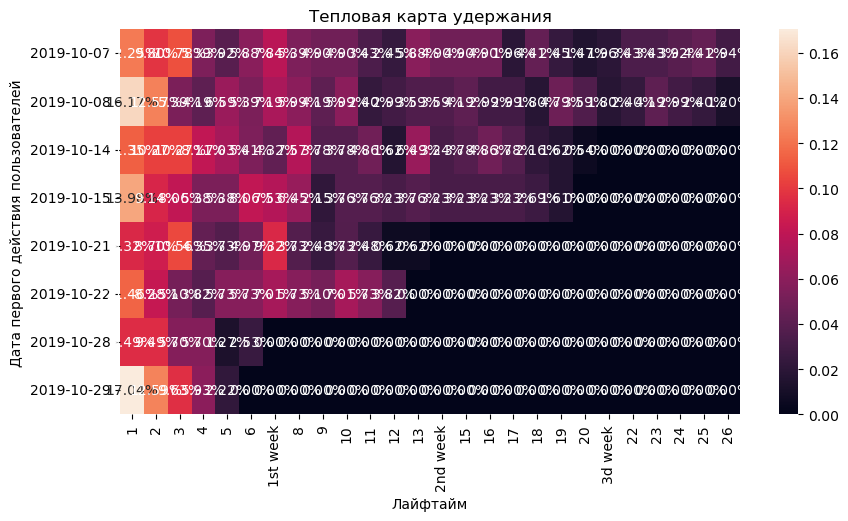

Для группы 2


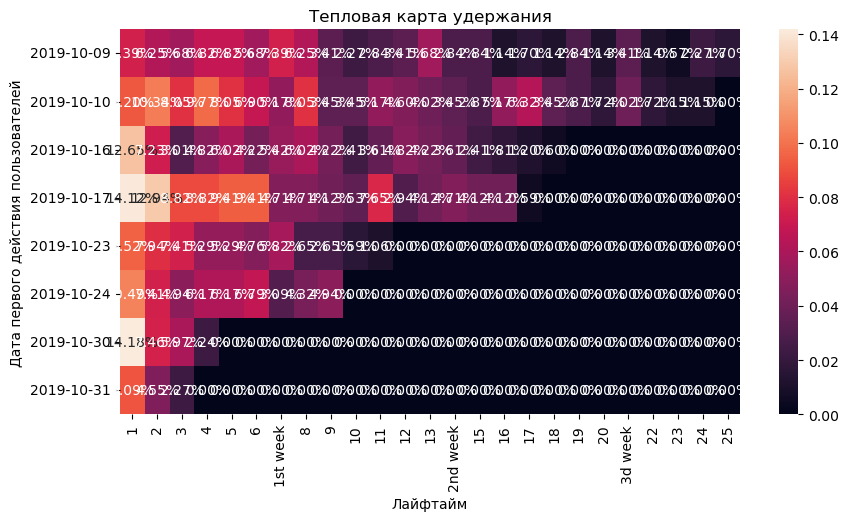

Для группы 3


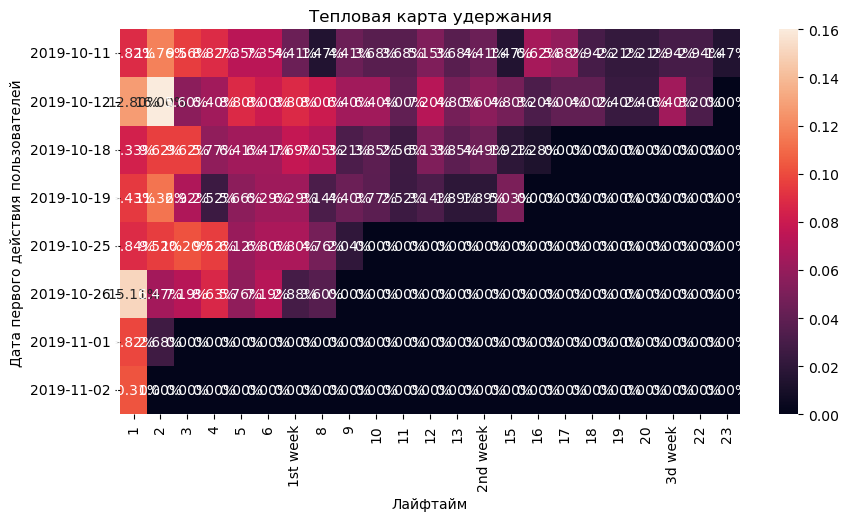

Для группы 4


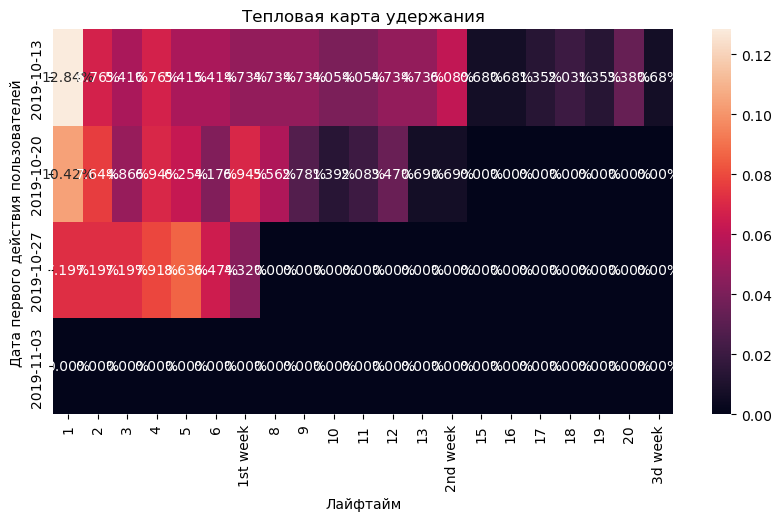

In [61]:
# удержание пользователей по группам
for i in data_shared['group_id'].unique():
    profiles_i = profiles[profiles['group_id'] == i].reset_index(drop=True)
    data_group_i = data_shared[data_shared['group_id'] == i].reset_index(drop=True)
    retention_raw_i, retention_rate_i = get_retention(profiles_i, data_group_i)
    retention_rate_i = retention_rate_i.rename(columns={7: '1st week', 14: '2nd week', 21: '3d week', 28: '4th week'})
    print( f'Для группы {i}')
    plt.figure(figsize=(10, 5)) 
    heatmap(retention_rate_i)

**Вывод:**
1. Для группы 1: 
    - удержание первой недели высокое более 20%, за исключением пользователей 28 октября. 
    - больше пользователей в сравнении с другими группами "прожили 4 неделия"
    - удержание равномерно высокое 
    - на второй неделе низким удержанием отличаются пользователи 21 октября
    - на третьей неделе в большую сторону отличаются пользовател 7 октября
2. Для группы 2:
    - удержание в группе крайне неравномерное, есть эксремально низкие таке и экстремально высокие значения удержания в первую неделю 
    - при этом пользователи, показавшие удержание в первую неделю 30% и прожившие 4 недели, показывают не слишком высокое удержание к 4ой неделе в сравнении с пользователями группы 1
    - а пользователи с наивысшим уровнем удержания в 1ую нелею показали удержание в 2ую неделю сравнимую с удержанием 4ой недели пользователей из 1ой группы
    - в целом удержание 2ой недели сравнимо с удержанием 2ой недели в группе 1, а удержание 3ей немного ниже
    - видно, что удержание пользователей на 1ой неделе, пришедших во вторник, значительно выше, чем для тех, кто пришел в среду, однако, поведение во вторую неделю может быть противоположным
3. Для группы 3:
    - пользователи группы 3 успели "прожить" только 3 недели 
    - картина по трем неделям похожа на картину группы 2, с четь меньшими колебаниями, но в целом удержания для разных дней первого посещения скачкообразно
4. Для группы 4:
    - удержание в 1ую неделю среднее, сравнимо с группой 1
    - однако, удержание во 2ую и 3ю неделю режко падает
    - можно отметить, что удержание в 3ю нелелю для этой группы ниже, чем удерание в 4ю неделю для групы 2

### Конверсия пользователей в целевое событие по сегментам

In [62]:
# расчет конверсии относительно общего числа пользователей (группа 1)
convertion = (data_group_1[data_group_1['event_name'] == 'show_contacts']['user_id'].nunique())/(data_group_1['user_id'].nunique())
f'Конверсия пользователей в целевое событие "просмотр контактов" для группы 1: {convertion:.2%}'

'Конверсия пользователей в целевое событие "просмотр контактов" для группы 1: 21.88%'

In [63]:
# расчет конверсии относительно общего числа пользователей (группа 2)
convertion = (data_group_2[data_group_2['event_name'] == 'show_contacts']['user_id'].nunique())/(data_group_2['user_id'].nunique())
f'Конверсия пользователей в целевое событие "просмотр контактов" для группы 2: {convertion:.2%}'

'Конверсия пользователей в целевое событие "просмотр контактов" для группы 2: 23.71%'

In [64]:
# расчет конверсии относительно общего числа пользователей (группа 3)
convertion = (data_group_3[data_group_3['event_name'] == 'show_contacts']['user_id'].nunique())/(data_group_2['user_id'].nunique())
f'Конверсия пользователей в целевое событие "просмотр контактов" для группы 3: {convertion:.2%}'

'Конверсия пользователей в целевое событие "просмотр контактов" для группы 3: 19.80%'

In [65]:
# расчет конверсии относительно общего числа пользователей (группа 4)
convertion = (data_group_4[data_group_4['event_name'] == 'show_contacts']['user_id'].nunique())/(data_group_4['user_id'].nunique())
f'Конверсия пользователей в целевое событие "просмотр контактов" для группы 4: {convertion:.2%}'

'Конверсия пользователей в целевое событие "просмотр контактов" для группы 4: 20.85%'

### ВЫВОД по разделу 4

1. Было сделано предположение, что группы пользователей, приходящих первый раз в приложение в разные дни недели могут отличаться по удержанию и конверсии:
- Группа 1 - пользователи, пришедшие в приложение в понедельник и вторник
- Группа 2 - пользователи, пришедшие в среду и четверг
- Группа 3 - пятница и суббота
- Группа 4 - воскресенье (т.к. оно выбивается из тренда снижения активности к концу недели)
2. Наиболее предсказуемое поведением обладают пользоватли, совршающие первое действие в приложении в понедельник или во вторник. В целом для них характерно наилучшее удержание к 4ой неделе (для тех пользователей, кто успел "прожить" до 4ой недели). Удержание на 2ую и треть неделю похожи для первых трех групп.
3. Наилучшая конверсия пользователей в целевое событие "просмотр контактов" наблюдается для пользователей, совершивших первое действие в среду или четверг (23,7%), на втором месте находятся пользователи пришедшие в понедельник или вторник - чуть меньше 22%.
4. С учетом двух рассмотренных поведенческих факторов, целевой группой из выделенных можно назвать группу 1 (пожертвовать 2% когверсии в пользу предсказуемости повдения), при этом про группу 2 тожн не стоит забывать и можно сосредосточиться на лучшем их удержании к 4ой неделе (а для тех, кто приходит в среду в принципе на лучшем удержании, т.к. они часто уходят на второй неделе)

## Проверка статсистических гипотез

### Функция проверки гипотезы

In [66]:
# функция проверки двусторонней гипотезы 
def statistic_check(data_total_1,data_total_2, data_success_1, data_success_2, alpha):

    customers = np.array([data_total_1['user_id'].nunique(), data_total_2['user_id'].nunique()])
    success = np.array([data_success_1['user_id'].nunique(), data_success_2['user_id'].nunique()])

    p1 = success[0]/customers[0]
    p2 = success[1]/customers[1]
    p_combined = (success[0] + success[1]) / (customers[0] + customers[1])
    difference = p1 - p2 
    z_value =  difference / mth.sqrt(p_combined * (1 - p_combined) * (1/customers[0] + 1/customers[1])) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)
    if p_value < alpha: 
        print('Отвергаем нулевую гипотезу: между группами есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы пользователей разными')

# принимаем альфа за 0,05
alpha = 0.05

### Гипотеза 1

**Группа пользователей, установивших приложение по ссылке yandex и по ссылке из google демонстрируют разную конверсию в просмотры контактов**

Н0: Между группой пользователей, установивших приложение по ссылке yandex, и группой пользователей, установивших приложение по ссылке из google, нет значимой разницы в конверсии в целевое событие "просмотр контактов"

Н1: Между группой пользователей, установивших приложение по ссылке yandex, и группой пользователей, установивших приложение по ссылке из google, есть значимая разница в конверсии в целевое событие "просмотр контактов"

#### Подготовка данных к проверке гипотезы 1

In [67]:
# Выделение группы пользователей, пришедших по ссылке Yandex
data_ya_total = data[data['source'] == 'yandex']
# Выделение группы пользователей, пришедших по ссылке google
data_g_total = data[data['source'] == 'google']

In [68]:
#выделение группы усмпешных событий в группе Yandex
data_ya_success = data_ya_total[data_ya_total['event_name'] == 'show_contacts']
#выделение группы усмпешных событий в группе Yandex
data_g_success = data_g_total[data_g_total['event_name'] == 'show_contacts']

#### Проверка гипотезы 1

In [69]:
statistic_check(data_ya_total, data_g_total, data_ya_success, data_g_success, alpha)

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы пользователей разными


### Гипотеза 2 

**Пользователи, переходящие в рекомендованные объявления, и пользователи, игнорирующие рекомендации демонстрируют разную конверсию в просмотры контактов**

Н0: Между группой пользователей, переходящих в рекомендованные объявления, и группой пользователей, игнорирующих рекомендации, нет значимой разницы в конверсии в целевое событие "просмотр контактов"

Н1: Между группой пользователей, переходящих в рекомендованные объявления, и группой пользователей, игнорирующих рекомендации, есть значимая разница в конверсии в целевое событие "просмотр контактов"

#### Подготовка данных к проверке гипотезы 2

In [70]:
# Поиск уникальных пользователей, переходящих по рекомендациям
users_use_recom = data[data['event_name'] == 'tips_click']['user_id'].unique()
# Выделение датасета с пользователями, переходящих по рекомендациям
data_recom_total = data.query('user_id in @users_use_recom')
# Выделение группы пользователей, не проходящих по рекомендациям 
data_not_recom_total = data.query('user_id not in @users_use_recom')

In [71]:
#выделение группы успешных событий в группе использующих рекомендации
data_recom_success = data_recom_total[data_recom_total['event_name'] == 'show_contacts']
#выделение группы усмпешных событий в группе игнорирующих 
data_not_recom_success = data_not_recom_total[data_not_recom_total['event_name'] == 'show_contacts']

In [72]:
# конверсия пользователей, использующих рекомендации
data_recom_success['user_id'].nunique()/data_recom_total['user_id'].nunique()

0.3105590062111801

In [73]:
# конверсия пользователей, не использующих рекомендации
data_not_recom_success['user_id'].nunique()/data_not_recom_total['user_id'].nunique()

0.22185847393603628

#### Проверка гипотезы 2

In [74]:
statistic_check(data_recom_total, data_not_recom_total, data_recom_success, data_not_recom_success, alpha)

p-значение:  0.00026645646284051416
Отвергаем нулевую гипотезу: между группами есть значимая разница


### ВЫВОД по разделу 5

По результатам статистической проверки гипотез выявлено:
1. Нет оснований считать разницу в конверсии в целевое действие между пользователями, скачавшими приложение по ссылке из Yandex и из Google, значимой.
2. Между группами пользователей, переходящим по рекомендациями и пользоватлями игнорирующими рекомендациями есть значимая разница в части конверсии в целевое действие.

## Общий вывод и рекомендации

1. Был рассмотрен объединенный датасет, содержащий 73 079 записей о событиях, совершенных 4 293 уникальными пользователей, установивших приложение. Датасет включает время события, его наименование, id пользователя, совершившего событие, источник установки приложения, и неделю, на которой было совершено событие, позже были добавлены дни недели, в которые было установлено приложение.<br>


2. По результатам оценки удержания:

    2.1. Максимальный срок «жизни» пользователей составляет 4 недели. Данный промежуток времени не позволяется оценить подробную детализацию удержания пользователей, но позволяет оценить общую картину поведения пользователей в приложении.<br>
    2.2. Максимальное удержание на 4ую неделю составляет 8.38%.  <br>
    2.3. При этом, общая картина (особенно значения удержания пользователей на первой недели) показывает нестабильное поведение пользователей, удержание на 1ую неделю варьируется о 9 до 35% .<br>
    2.4. Такая нестабильность может быть обусловлена дополнительными или внешними факторами, о которых мы не знаем (объявление приложением скидок на доставку, добавление нового функционала, который понравился пользователям или нет, проведена рекламная компания, было объявлено о закрытии магазина и теперь покупатели ищут эти товары на вторичном рынке и т.д.) 
    
    
3. По результатам оценки времени, проведенного в приложении выявлено:

    3.1. Среднестатистический пользователь проводит в приложении около 6 минут за 1 сессию. Не много, но достаточно, чтобы использовать несколько фильтров, найти необходимый предмет и как минимум добавить его в избранное или написать продавцу. <br>
    3.2. Самая высокая активность пользователей наблюдается с 14:30 до 14:00 и с 16:00 до 17:00. С учетом типичного времени сессии пользователь вполне могут заглянуть в приложение во время небольшого перерыва в рабочем процессе, обеда или перед уходом из офиса (в зависимости от типичного рабочего дня для наших пользователей). Также активность наблюдается в вечернее время, когда пользователи чаще всего приходят домой с работы. <br>
    3.3. По дням недели самая высокая активность пользователей в понедельник, потом постепенно снижается до субботы и в воскресенье вновь увеличивается.  <br>
    3.4. Показатели того, когда пользователи больше всего заходят в приложение могут помочь выбрать время для запуска обновлений, предложения скидок, выгодных условий и дополнительных рекомендаций пользователям.<br>
    3.5. Общая конверсия пользователей в целевое событие «просмотр контактов» составляет 23%, что является достаточно высоким значением, но требуется рассмотрение различных групп, чтобы определить где конверсия не достаточная.
    
    
4. Для более детального анализа были выбран признак: в какой день недели пользователь пришел в приложение (сделал первое действие). По результатам анализа групп:

    4.1. Наиболее предсказуемое поведением обладают пользователи, совершающие первое действие в приложении в понедельник или во вторник.<br>
    4.2. Наилучшая конверсия пользователей в целевое событие "просмотр контактов" наблюдается для пользователей, совершивших первое действие в среду или четверг (23,71%).<br>
    4.3. Однако, стоит порекомендовать «пожертвовать» уровнем конверсии и выбрать целевой группой тех, пользователей, которые приходят в приложение в первой половине недели (можно захватить понедельник, вторник и среду) (для пользователей, приходящих в понедельник и вторник конверсия составляет 21,88%.<br>
    4.4. Определение целевой группы позволит увеличить интенсивность рекламы в эти дни, чаще показывать выгодные предложения, также можно подготовить рекомендации для продавцов, в какие дни и время лучше выкладывать объявления о продаже, а также предложить услугу обновления (повышение в выдаче объявлений) в более «выгодные» дни.<br>
    
    
5. По результатам статистической проверки гипотез выявлено:

    5.1. Нет оснований считать разницу в конверсии в целевое действие между пользователями, скачавшими приложение по ссылке из Yandex и из Google, значимой. <br>
    5.2. То есть скорее всего нет смыла увеличения маркетинговых затрат на ту или иную платформу. <br>
    5.3. Между группами пользователей, переходящим по рекомендациям и пользователями игнорирующими рекомендациями есть значимая разница в части конверсии в целевое действие. <br>
    5.4. То есть, можно предположить, что рекомендации в приложении действительно эффективны и улучшение данного функционала – это перспективное развитие приложения.
